<a href="https://www.kaggle.com/code/hsw1212/lung-x-ray-classification-resnet-82?scriptVersionId=139948447" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-masks-and-labels/data/Lung Segmentation/NLM-ChinaCXRSet-ReadMe.docx
/kaggle/input/chest-xray-masks-and-labels/data/Lung Segmentation/NLM-MontgomeryCXRSet-ReadMe.pdf
/kaggle/input/chest-xray-masks-and-labels/data/Lung Segmentation/ClinicalReadings/CHNCXR_0499_1.txt
/kaggle/input/chest-xray-masks-and-labels/data/Lung Segmentation/ClinicalReadings/CHNCXR_0120_0.txt
/kaggle/input/chest-xray-masks-and-labels/data/Lung Segmentation/ClinicalReadings/CHNCXR_0192_0.txt
/kaggle/input/chest-xray-masks-and-labels/data/Lung Segmentation/ClinicalReadings/CHNCXR_0548_1.txt
/kaggle/input/chest-xray-masks-and-labels/data/Lung Segmentation/ClinicalReadings/CHNCXR_0119_0.txt
/kaggle/input/chest-xray-masks-and-labels/data/Lung Segmentation/ClinicalReadings/CHNCXR_0403_1.txt
/kaggle/input/chest-xray-masks-and-labels/data/Lung Segmentation/ClinicalReadings/CHNCXR_0368_1.txt
/kaggle/input/chest-xray-masks-and-labels/data/Lung Segmentation/ClinicalReadings/CHNCXR_0190_0.txt
/kaggle/in

In [2]:
import os


# Find image names in the file
path_CXR = "/kaggle/input/chest-xray-masks-and-labels/Lung Segmentation/CXR_png"
os.chdir(path_CXR)

png_name = []
for file in os.listdir():
    if file.endswith(".png"):
        png_name.append(file)

path_test = "/kaggle/input/chest-xray-masks-and-labels/Lung Segmentation/test/"
os.chdir(path_test)

test_name = []
for file in os.listdir():
    if file.endswith(".png"):
        test_name.append(file)

In [3]:
# 0: Normal
# 1: Tuberculosis
# 2: Bacteria
# 3: Virus

# Data from Chest Xray Masks and Labels 
# Read train data 
import cv2
import numpy as np

size = 120

data = []
label = []
for i, file in enumerate(png_name):
    # read images and append data
    img = cv2.imread("/kaggle/input/chest-xray-masks-and-labels/Lung Segmentation/CXR_png/{}".format(file),
                      cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (size, size))
    data.append(img)

    # Split labels from file names
    split_str = file.split(".")
    label.append((int)(split_str[0].split("_")[2]))

x_train = np.array(data).reshape(-1,size,size,1)
y_train = np.array(label)

print("check")
# Read test data 
data = []
label = []
for i, file in enumerate(test_name):
    # read images and append data
    img = cv2.imread("/kaggle/input/chest-xray-masks-and-labels/Lung Segmentation/test/{}".format(file), 
                     cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (size, size))
    data.append(img)

    # Split labels from file names
    split_str = file.split(".")
    label.append((int)(split_str[0].split("_")[2]))

x_test = np.array(data).reshape(-1,size,size,1)
y_test = np.array(label)

print("check")
# Data from Chest X-Ray Images (Pneumonia) 
# Read train data 
# Normal
data = []
label = []

path = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/"
os.chdir(path)
for file in os.listdir():
    if file.endswith(".jpeg"):
        img = cv2.imread("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/{}".format(file), 
                        cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (size, size))
        data.append(img)
        label.append(0)

data = np.array(data).reshape(-1,size,size,1)
label = np.array(label)

x_train = np.concatenate((x_train, data), axis=0)
y_train = np.concatenate((y_train, label), axis=0)

print("check")
# Abnormal
data = []
label = []

path = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/"
os.chdir(path)
for i, file in enumerate(os.listdir()):
    if i <= 1400 and file.endswith(".jpeg"):
        img = cv2.imread("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/{}".format(file), 
                         cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (size, size))
        data.append(img)
        
        if file.split("_")[1] == "bacteria":
            label.append(2)
        elif file.split("_")[1] == "virus":
            label.append(3)

data = np.array(data).reshape(-1,size,size,1)
label = np.array(label)

x_train = np.concatenate((x_train, data), axis=0)
y_train = np.concatenate((y_train, label), axis=0)

print("check")


# Read Test data 
# Normal
data = []
label = []

path = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/"
os.chdir(path)
for file in os.listdir():
    if file.endswith(".jpeg"):
        img = cv2.imread("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/{}".format(file), 
                        cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (size, size))
        data.append(img)
        label.append(0)

data = np.array(data).reshape(-1,size,size,1)
label = np.array(label)

x_test = np.concatenate((x_test, data), axis=0)
y_test = np.concatenate((y_test, label), axis=0)

print("check")
# Abnormal
data = []
label = []

path = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/"
os.chdir(path)
for _, file in enumerate(os.listdir()):
    if file.endswith(".jpeg"):
        img = cv2.imread("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/{}".format(file), 
                         cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (size, size))
        data.append(img)

        if file.split("_")[1] == "bacteria":
            label.append(2)
        elif file.split("_")[1] == "virus":
            label.append(3)

data = np.array(data).reshape(-1,size,size,1)
label = np.array(label)

x_test = np.concatenate((x_test, data), axis=0)
y_test = np.concatenate((y_test, label), axis=0)

print("check")

check
check
check
check
check
check


In [4]:
x_train = np.concatenate((x_train, x_test), axis=0)
y_train = np.concatenate((y_train, y_test), axis=0)

In [5]:
# the number of '0' normal and '1' - '3' abnormal label

print("Train labels: 0: ", len(x_train[y_train == 0]), ", 1: ", len(x_train[y_train == 1]), ", 2: ", len(x_train[y_train == 2]), ", 3: ", len(x_train[y_train == 3]))
# print("Test labels: 0: ", len(x_test[y_test == 0]), ", 1: ", len(x_test[y_test == 1]), ", 2: ", len(x_test[y_test == 2]), ", 3: ", len(x_test[y_test == 3]))

print(x_train.shape)
# print(x_test.shape)

Train labels: 0:  2028 , 1:  443 , 2:  1136 , 3:  655
(4262, 120, 120, 1)


Text(0.5, 1.0, 'label = 3')

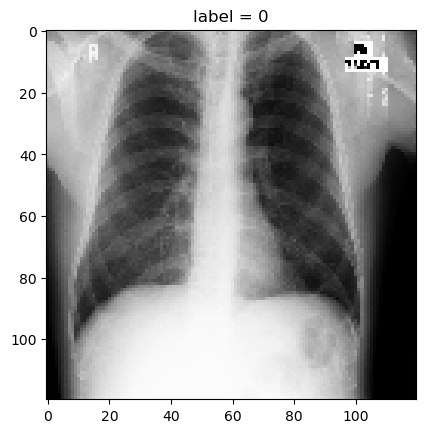

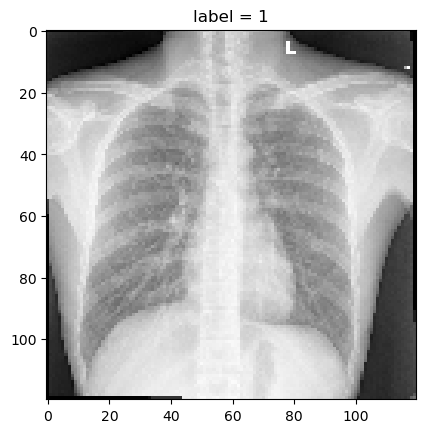

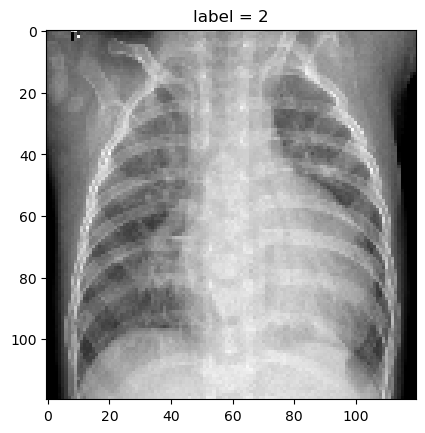

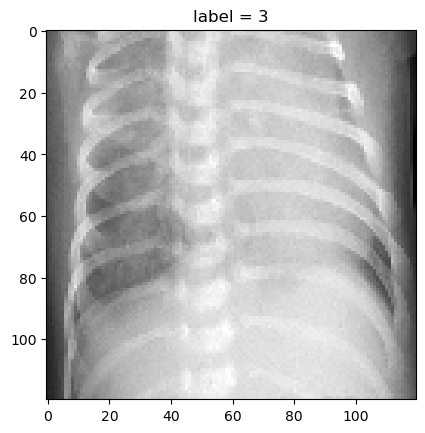

In [6]:
# Show X-ray images
import matplotlib.pyplot as plt

plt.figure()
plt.imshow((x_train[y_train == 0])[10], cmap='gray')
plt.title("label = {}".format((y_train[y_train == 0])[10]))

plt.figure()
plt.imshow((x_train[y_train == 1])[20], cmap='gray')
plt.title("label = {}".format((y_train[y_train == 1])[20]))

plt.figure()
plt.imshow((x_train[y_train == 2])[30], cmap='gray')
plt.title("label = {}".format((y_train[y_train == 2])[20]))

plt.figure()
plt.imshow((x_train[y_train == 3])[15], cmap='gray')
plt.title("label = {}".format((y_train[y_train == 3])[20]))

In [7]:
# Build model
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.optim as optim
from torchvision.models import resnet50, ResNet50_Weights
import keras as k

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Build ResNet50 model
model = resnet50(weights = ResNet50_Weights)
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

# Dont train weights in feature extractor layers
# for param in ResNet50.parameters():
#     param.requires_grad = False 
'''
def init_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)
'''
# Connect to fully connnected layer
model.fc = nn.Sequential(
    nn.Linear(2048,512),
    nn.ReLU(inplace=True),
    nn.Linear(512,64),
    nn.ReLU(inplace=True),
    nn.Linear(64,4)
)

# model.apply(init_weights)
model.to(device)

y_train = k.utils.to_categorical(y_train, num_classes=4)
y_test = k.utils.to_categorical(y_test, num_classes=4)

# model
print(y_train.shape)
print(y_test.shape)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

(4262, 4)
(720, 4)


In [8]:
from sklearn.model_selection import train_test_split

# Set data loader
class cifar10Dataset(Dataset):
    def __init__(self, imgs, labels, transform=None):
        self.imgs = imgs
        self.labels = labels
        self.transforms = transform

    def __len__(self):
        return len(self.imgs)
    
    def __getitem__(self, index):
        x = self.imgs[index]
        y = self.labels[index]

        if self.transforms:
            x = self.transforms(x)

        # x = x.float()
        return x, y

# Split train and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size=0.2, 
                                                  random_state=100,
                                                  shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(x_train, 
                                                    y_train, 
                                                    test_size=0.3, 
                                                    random_state=100,
                                                    shuffle=True)

learningRate = 0.001
batch_size = 64

# Set loss function and optimiser
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = learningRate)

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = cifar10Dataset(x_train, y_train, transform)
val_dataset = cifar10Dataset(x_val, y_val, transform)
test_dataset = cifar10Dataset(x_test, y_test, transform)
train_loader = DataLoader(dataset=train_dataset, batch_size= batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size= batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size= batch_size, shuffle=True)


In [10]:
os.walk('/kaggle/output')

# Train loop
num_epoch = 30
best_val_accuracy = 0.0

for epoch in range(num_epoch):
    model.train()
    for images, labels in train_loader:
        images, labels = images.float().to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images, labels = images.float().to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            _, labels = torch.max(labels, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        val_accuracy = correct / total
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            # torch.save(model.state_dict(), 'best_model.pth')
        
        print(f'Epoch [{epoch+1}/{num_epoch}], Validation Accuracy: {val_accuracy:.4f}, BEST Accuracy: {best_val_accuracy:.4f}')

print('Training Finished!')


Epoch [1/30], Validation Accuracy: 0.7046, BEST Accuracy: 0.7046
Epoch [2/30], Validation Accuracy: 0.7292, BEST Accuracy: 0.7292
Epoch [3/30], Validation Accuracy: 0.7057, BEST Accuracy: 0.7292
Epoch [4/30], Validation Accuracy: 0.7726, BEST Accuracy: 0.7726
Epoch [5/30], Validation Accuracy: 0.7737, BEST Accuracy: 0.7737
Epoch [6/30], Validation Accuracy: 0.6366, BEST Accuracy: 0.7737
Epoch [7/30], Validation Accuracy: 0.6893, BEST Accuracy: 0.7737
Epoch [8/30], Validation Accuracy: 0.7655, BEST Accuracy: 0.7737
Epoch [9/30], Validation Accuracy: 0.6741, BEST Accuracy: 0.7737
Epoch [10/30], Validation Accuracy: 0.7843, BEST Accuracy: 0.7843
Epoch [11/30], Validation Accuracy: 0.7632, BEST Accuracy: 0.7843
Epoch [12/30], Validation Accuracy: 0.7843, BEST Accuracy: 0.7843
Epoch [13/30], Validation Accuracy: 0.7796, BEST Accuracy: 0.7843
Epoch [14/30], Validation Accuracy: 0.7878, BEST Accuracy: 0.7878
Epoch [15/30], Validation Accuracy: 0.7421, BEST Accuracy: 0.7878
Epoch [16/30], Vali

In [11]:
# model.load_state_dict(torch.load('best_model.pth'))
model.eval()

total = 0
correct = 0

for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    batch_outputs = model(images) 
    _, predicted = torch.max(batch_outputs, 1)
    _, labels = torch.max(labels, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    
test_accuracy = correct / total
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.8220918866080157
